In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("simulation"))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("Configurations"))))
from simulation import simulateShift
from simulation import simulateTrend
from utils import plotUtils
from utils import dataframeUtil
import Configurations as config
from utils import modelUtils
import numpy as np
from tensorflow import keras
import pandas as pd
from utils import statisticsUtils
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
# Import Dataset
x,y = dataframeUtil.getDataset(config.testDatasetName,config.neuralInputsNumber,config.numberOftargetVariables)

In [2]:
#model_shiftUp = getMoldel.saveShiftUpModel()
#model_shiftDown = getMoldel.saveShiftDownModel()

model_shiftUp = keras.models.load_model('model/shiftUpModel')
model_shiftDown = keras.models.load_model('model/shiftDownModel')
model_trend = keras.models.load_model('model/trend')
def multiModelsPrediction(chart):
    predictions =[]
    result=model_trend.predict(chart)
    predictions.append(int(np.round(result[0][0])))
    predictions.append(int(np.round(result[0][1])))
    #print("Prediction model_trend", predictions[0:2])

    result= model_shiftUp.predict(chart)
    predictions.append(int(np.round(result)[0]))
    #print("Prediction shiftUp", predictions[2])

    result=model_shiftDown.predict(chart)
    predictions.append(int(np.round(result)[0]))
    #print("Prediction shifDown", predictions[3])
    detections = plotUtils.getDetections([predictions],['trendUp', 'trendDown', 'shiftUp' ,'shiftDown'])
    return [predictions],detections
    



In [2]:
#Import Artificial neural networks
ann_model = keras.models.load_model('model/ann_model')
def ann_model_predict(chart):
    predictions= ann_model.predict(chart)
    predictions = np.round(predictions)
    detections = plotUtils.getDetections(predictions,['trendUp', 'trendDown', 'shiftUp' ,'shiftDown'])
    predictions = predictions.astype(int)
    return predictions,detections
    

In [3]:
#Import Random Forest Model
random_forest_model = joblib.load("model/random_forest.joblib")

In [6]:
#prediction
y_pred_random_forest =random_forest_model.predict(x)
print(y_pred_random_forest.shape)

y_pred_ANN,_= ann_model_predict(x)
print(y_pred_ANN.shape)

(1602, 4)
(1602, 4)


In [19]:
#Metrics
accuracyScore,confusionMatrix,report = modelUtils.getMetric(y_pred_random_forest,y)
print(confusionMatrix)
accuracyScore,confusionMatrix,report = modelUtils.getMetric(y_pred_ANN,y)
print(confusionMatrix)

0.9744069912609239
[[963   8  12  18]
 [  0 199   0   2]
 [  0   0 200   0]
 [  0   1   0 199]]
0.7546816479400749
[[609  94 238  60]
 [  0 201   0   0]
 [  0   0 200   0]
 [  0   1   0 199]]


In [14]:
    #y_predictions_flatten=np.argmax(y_predictions, axis=1)
    #test_y_flatten=np.argmax(test_y, axis=1)
#confusionMatrix = confusion_matrix(y,y_pred_ANN)
report = classification_report(y,y_pred_ANN)
accurancy = accuracy_score(y, y_pred_ANN)
print(report)
    #print(confusionMatrix)
print(accurancy)

              precision    recall  f1-score   support

           0       0.34      1.00      0.51       201
           1       0.68      1.00      0.81       201
           2       0.46      1.00      0.63       200
           3       0.77      0.99      0.87       200

   micro avg       0.51      1.00      0.67       802
   macro avg       0.56      1.00      0.70       802
weighted avg       0.56      1.00      0.70       802
 samples avg       0.50      0.50      0.50       802

0.5156054931335831


C:\Users\Kal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(1, 7)
ann_model_predict [[0 0 0 0]]


(-0.18488054090497882, -0.09674568640282111)

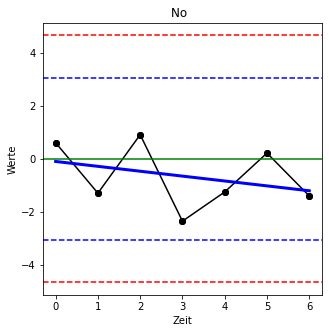

In [15]:

chart = dataframeUtil.getRandomChartFrom_csv(setting.testDatasetName," ",-1)


print(chart.shape)
#predictions= multiModelsPrediction(chart)
#print("multyModelsPrediction ",predictions)
#chartWithSlope=statisticsUtils.addReqSlope(chart)
predictions,_=ann_model_predict(chart)
print("ann_model_predict",predictions)
plotUtils.plotSlope(chart[0])



In [39]:
def predict(chart):
    predictions= model_general.predict(chart)
    predictions = np.round(predictions)
    return predictions

neuralInputsNumber = setting.neuralInputsNumber
targetVarNumber = 4
test_df = pd.read_csv(setting.testDatasetName)
x = test_df.iloc[:,0:neuralInputsNumber].values
y = test_df.iloc[:,neuralInputsNumber:neuralInputsNumber+targetVarNumber].values

pred =[]
results=[]
for index in range(len(x)):
    x_reshaped =x[index]
    x_reshaped.shape=(1,len(x[index]))
    predictions=predict(x_reshaped)
    pred.append(pred)
    tmp = predictions == y[index]
    tmp = tmp.astype(int)   
    print("generalModel",predictions)
    print(tmp)

generalModel [[0. 0. 0. 0.]]
[[1 1 1 1]]
generalModel [[0. 1. 0. 0.]]
[[1 1 1 1]]
generalModel [[0. 0. 0. 0.]]
[[1 1 1 1]]
generalModel [[0. 0. 0. 0.]]
[[1 1 1 1]]
generalModel [[0. 1. 0. 0.]]
[[1 1 1 1]]
generalModel [[0. 0. 0. 0.]]
[[1 1 1 1]]
generalModel [[1. 0. 0. 0.]]
[[1 1 1 1]]
generalModel [[0. 0. 0. 0.]]
[[1 1 1 1]]
generalModel [[0. 0. 0. 0.]]
[[1 1 1 1]]
generalModel [[1. 0. 0. 0.]]
[[1 1 1 1]]
generalModel [[0. 0. 0. 1.]]
[[1 1 1 0]]
generalModel [[1. 0. 0. 0.]]
[[1 1 1 1]]
generalModel [[0. 0. 0. 0.]]
[[1 1 1 0]]
generalModel [[0. 0. 0. 0.]]
[[1 1 1 1]]
generalModel [[0. 0. 0. 1.]]
[[1 1 1 1]]
generalModel [[0. 0. 0. 1.]]
[[1 1 1 0]]
generalModel [[0. 0. 0. 0.]]
[[1 1 1 1]]
generalModel [[0. 0. 1. 0.]]
[[1 1 0 1]]
generalModel [[1. 0. 0. 0.]]
[[1 1 1 1]]
generalModel [[0. 0. 0. 0.]]
[[1 1 1 1]]
generalModel [[1. 0. 0. 0.]]
[[1 1 1 1]]
generalModel [[0. 0. 0. 1.]]
[[1 1 1 1]]
generalModel [[0. 0. 0. 0.]]
[[1 1 1 1]]
generalModel [[0. 1. 0. 0.]]
[[1 1 1 1]]
generalModel [[0

KeyboardInterrupt: 